## Day3-2 作業
### 1.1. 讀取 txt 檔, 請讀取 text file

https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### 1.2 將所提供的 txt 轉成 pandas dataframe
2. 從所提供的 txt 中的連結讀取圖片，請讀取上面 data frame 中的前 5 張圖片



In [1]:
import numpy as np
import pandas as pd
import requests

In [2]:
## 假如我們不想把資料載到自己的電腦裡?## 假如我們 
# 把連結填入

url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"
re = requests.get(url)
data = re.text

In [16]:
print(data)

n00015388_157	http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
n00015388_238	http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
n00015388_304	http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
n00015388_327	http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
n00015388_355	http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
n00015388_373	http://img172.imageshack.us/img172/4606/napo03072en9.jpg
n00015388_379	http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg
n00015388_388	http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg
n00015388_442	http://www.porschemania.it/discus/messages/815/102099.jpg
n00015388_474	http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg
n00015388_514	http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg
n00015388_671	http://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg
n00015388_686	http://farm1.static.flic

In [3]:
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

#### 找到換行符號，用該符號做字串分割後，把它拿掉

In [4]:
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

#### 將 txt 轉成 pandas dataframe

In [5]:
arrange_data = [i.split('\t') for i in data]
df = pd.DataFrame(arrange_data, columns=['id', 'url'])
df.head()

,id,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


In [6]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0, 'url']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

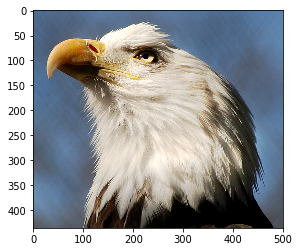

In [7]:
# Convert img to numpy array
plt.imshow(img)
plt.show()

In [8]:
def img2arr_fromURLs(url_list, resize = False):
    img_list = []
    for url in url_list:
        try:
            img = Image.open(BytesIO(requests.get(url).content))
            img_list.append(img)
        except IOError:
            print('df[%s] link read error!' % pd.Index(url_list).get_loc(url))
            break        
    return img_list

df[4] link read error!
Total images that we got: 4 


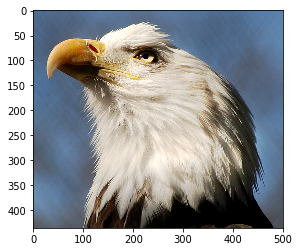

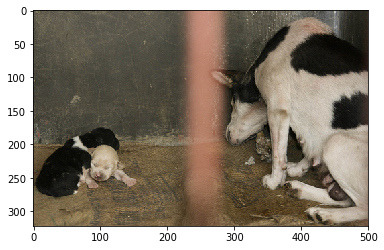

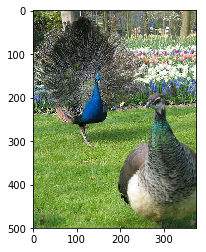

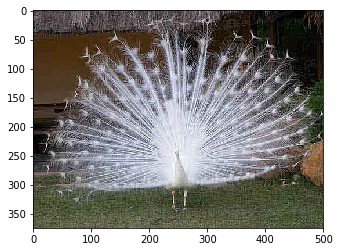

In [9]:
result = img2arr_fromURLs(df[0:5]['url'].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

In [12]:
df['url'][1]

'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'

### 輸入圖像
#### 方法一

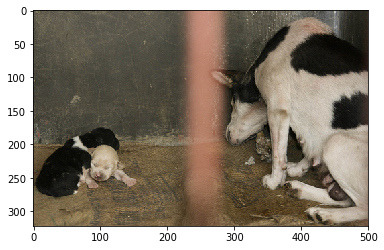

In [23]:
import skimage.io as skio
img1 = skio.imread(df['url'][1])
plt.imshow(img1)

#### 方法二 (url 如果是 / 的就讀不到， 要 \ 的才讀得到)

In [40]:
print(df['url'][1])

http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg


In [44]:
ima = 'C:\\pic\\14610701_10208979020286550_1146448360_n.jpg'

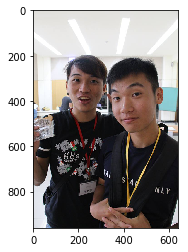

In [45]:
from PIL import Image
img2 = Image.open(ima)
img2 = np.array(img2)
plt.imshow(img2)
plt.show()

#### 方法三 (url 如果是 / 的就讀不到， 要 \ 的才讀得到)

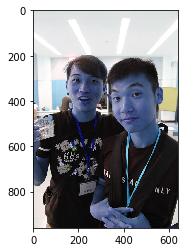

In [46]:
import cv2

img3 = cv2.imread(ima)
plt.imshow(img3)
plt.show()


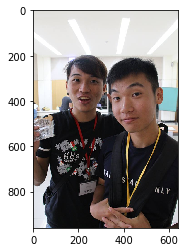

In [49]:
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

## 將影像存成 mat

In [52]:
import scipy.io as sio
sio.savemat(file_name='C:\jupyter note\ML_100day\example.mat', mdict={'img':img1})

In [53]:
mat_arr = sio.loadmat('C:\jupyter note\ML_100day\example.mat')
print(mat_arr.keys())

dict_keys(['__header__', '__version__', '__globals__', 'img'])


In [54]:
mat_arr = mat_arr['img']
print(mat_arr.shape)

(322, 500, 3)


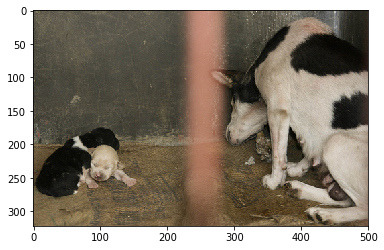

In [55]:
plt.imshow(mat_arr)
plt.show()